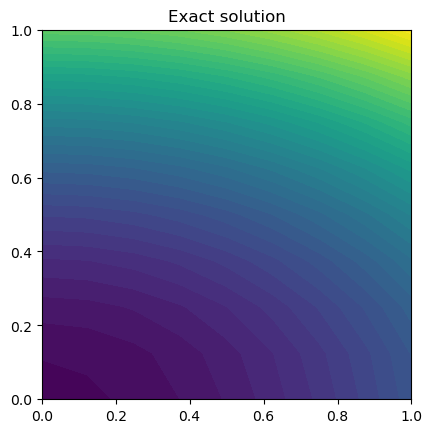

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
error =  2.128368506420727e-15


In [1]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define initial condition expression g (will also be used as boundary
# condition), and interpolate into initial function u0
alpha = 3.0
beta = 1.2
g = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
               alpha=alpha, beta=beta, t=0, degree=2)
u0 = interpolate(g, V)

# Define boundary condition
bc = DirichletBC(V, g, "on_boundary")

# Define timestep and end-time
dt = 0.3
T = 1.8

# Define variational problem for each time-step
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)
a = u*v*dx + dt*inner(grad(u), grad(v))*dx
L = (u0 + dt*f)*v*dx

# Assemble once before the time-stepping begins
A = assemble(a)

# Define function for unknown at this time step
u1 = Function(V)

# Run time-loop
t = dt
while t <= T:
    # Assemble right-hand side vector
    b = assemble(L)

    # Update and apply boundary condition
    g.t = t
    bc.apply(A, b)

    # Solve linear system of equations
    solve(A, u1.vector(), b)

    # Update time and previous function
    t += dt
    u0.assign(u1)

plot(u1, title="Approximated solution")
plot(g, mesh=mesh, title="Exact solution")
plt.show()

print("error = ", errornorm(u1, interpolate(g, V)))

Solving linear variational problem.


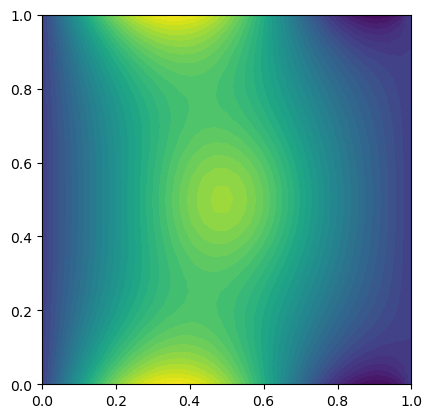

In [4]:
"""This demo program solves Poisson's equation

    - div grad u(x, y) = f(x, y)

on the unit square with source f given by

    f(x, y) = 10*exp(-((x - 0.5)^2 + (y - 0.5)^2) / 0.02)

and boundary conditions given by

    u(x, y) = 0        for x = 0 or x = 1
du/dn(x, y) = sin(5*x) for y = 0 or y = 1
"""

# Copyright (C) 2007-2011 Anders Logg
#
# This file is part of DOLFIN.
#
# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.
#
# First added:  2007-08-16
# Last changed: 2012-11-12

# Begin demo

from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2) # f = 1.
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u)#, interactive=True)
plt.show()